# 1 图像预处理

## 1.1 数据增强（Data Augmentation）简介

### 原理:

深度学习通常会要求拥有充足的训练样本，一般来说，总量越大，训练得到的模型效果越好。  
在图像任务中，对输入图像进行一些简单的平移、缩放和颜色变换，并不会影响图像类别。例如，水平翻转后的狗的图像，它的类别还是犬类。  

数据增强：利用平移、缩放、颜色等变换，人工增大训练集样本个数，从而获得充足的训练集，使模型训练效果更好。  

## 1.2 图像编码处理

[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 ...

 [[233 231 236]
  [233 231 236]
  [233 231 236]
  ...
  [237 235 240]
  [237 235 240]
  [237 235 240]]

 [[233 231 236]
  [233 231 236]
  [233 231 236]
  ...
  [237 235 240]
  [237 235 240]
  [237 235 240]]

 [[233 231 236]
  [233 231 236]
  [233 231 236]
  ...
  [237 235 240]
  [237 235 240]
  [237 235 240]]]


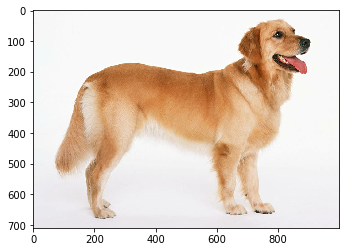

In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 读取图像的原始数据
image_raw_data  = tf.gfile.GFile('dog.jpg', 'rb').read()

with tf.Session() as sess:
    # 对图像进行jpeg/png的格式解码，从而得到图像对应的三维矩阵
    img_data = tf.image.decode_jpeg(image_raw_data)
    # img_data = tf.image.decode_png(image_raw_data)
    
    # 解码之后的结果是一个张量
    print(img_data.eval())
    
    # 可视化
    plt.imshow(img_data.eval())
    plt.show()

## 1.3 图像缩放 tf.image.resize_images(images, new_height, new_width, method)

### 1.3.1 双线性插值法 ResizeMethod.BILINEAR(默认设置)，对应method=0

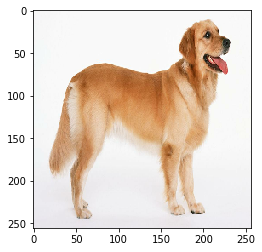

In [6]:
with tf.Session() as sess:
    # 用双线性插值法将图像缩放为指定尺寸
    resized1 = tf.image.resize_images(img_data, [256, 256], method=0)
    # TensorFlow的函数处理图片后存储的数据是float32格式的，需要转换成uint8才能正确打印图片
    resized1 = np.asarray(resized1.eval(), dtype='uint8')
    plt.imshow(resized1)
    plt.show()

### 1.3.2 最近邻插值法NEAREST_NEIGHBOR, 对应method=1

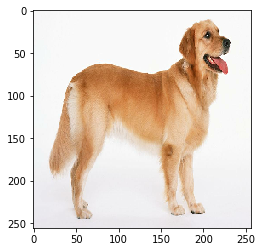

In [7]:
with tf.Session() as sess:
    # 用最近邻插值法将图像缩放为指定尺寸
    resized2 = tf.image.resize_images(img_data, [256,256], method=1)
    resized2 = np.asarray(resized2.eval(), dtype='uint8')
    plt.imshow(resized2)
    plt.show()

### 1.3.3 双立方插值法BICUBIC,对应method=2

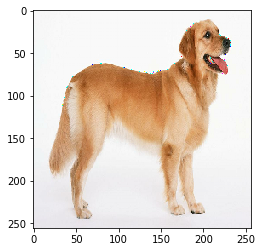

In [9]:
with tf.Session() as sess:
    # 用双立方插值法将图像缩放为指定尺寸
    resized3 = tf.image.resize_images(img_data, [256, 256], method=2)
    resized3 = np.asarray(resized3.eval(), dtype='uint8')
    plt.imshow(resized3)
    plt.show()

### 1.3.4 像素区域插值法AREA，对应method=3

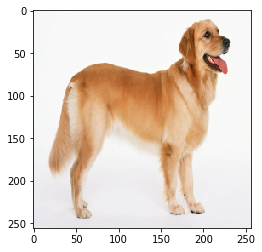

In [10]:
with tf.Session() as sess:
    # 用像素区域插值法将图像缩放为指定尺寸
    resized4 = tf.image.resize_images(img_data, [256, 256], method=3)
    resized4 = np.asarray(resized4.eval(), dtype='uint8')
    plt.imshow(resized4)
    plt.show()

## 1.4 裁剪或填充后缩放  

### 1.4.1 tf.image.resize_image_with_crop_or_pad(image, target_height, target_width)

### 1.4.2 如果目标图像尺寸小于原始图像尺寸，则在中心位置裁剪，反之则用黑色像素进行填充


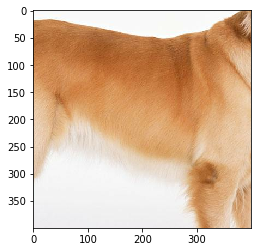

In [11]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 400, 400)
    plt.imshow(croped.eval())
    plt.show()

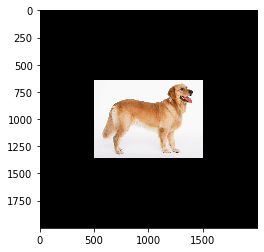

In [12]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 2000, 2000)
    plt.imshow(padded.eval())
    plt.show()

## 1.5 随机裁剪

### 1.5.1 tf.image.random_crop(image, size, seed=None, name=None)

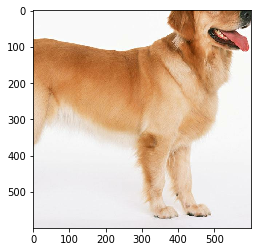

In [17]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    random_croped1 = tf.random_crop(img_data, [600, 600,3])
    plt.imshow(random_croped1.eval())
    plt.show()

### 1.5.2 再次随机裁剪，验证随机性

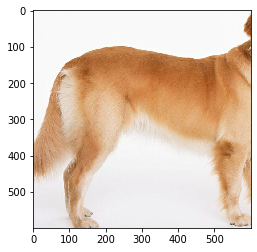

In [18]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    random_croped1 = tf.random_crop(img_data, [600, 600,3])
    plt.imshow(random_croped1.eval())
    plt.show()

## 1.6 水平翻转 tf.image.flip_left_right(img_data)

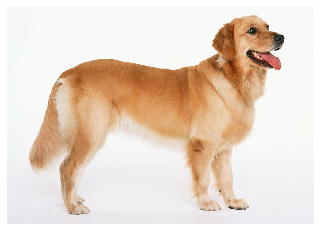

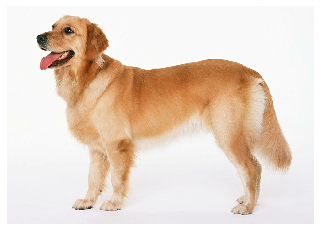

In [19]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.axis('off')
    plt.show()
    flip_left_right = tf.image.flip_left_right(img_data)
    plt.imshow(flip_left_right.eval())
    plt.axis('off')
    plt.show()

## 1.7 上下翻转 tf.image.flip_up_down(img_data)


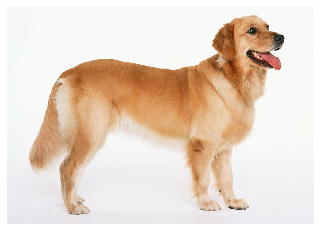

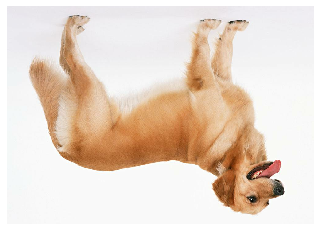

In [20]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.axis('off')
    plt.show()
    flip_up_down = tf.image.flip_up_down(img_data)
    plt.imshow(flip_up_down.eval())
    plt.axis('off')
    plt.show()

## 1.8 改变对比度 tf.image.random_contrast

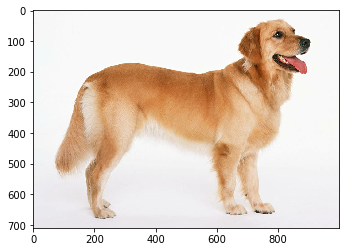

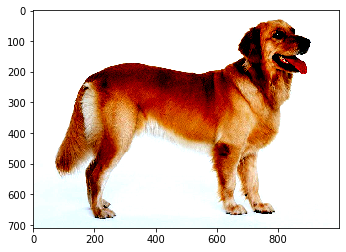

In [26]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.show()
    
    # 将图像的对比度降低至原来的二分之一
    contrast = tf.image.adjust_contrast(img_data, 0.5)
    # 将图像的对比度提高至原来的5倍
    #contrast = tf.image.adjust_contrast(img_data, 5)
    # 在[lower, upper]范围随机调整图像对比度
    contrast = tf.image.random_contrast(img_data, lower=0.2, upper=3)
    
    plt.imshow(contrast.eval())
    plt.show()

## 1.9 白化处理

### 1.9.1将图像的像素值转化成零均值和单位方差

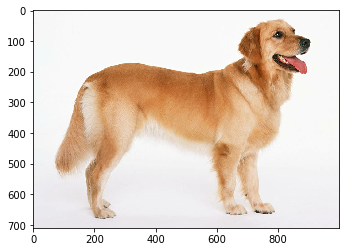

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


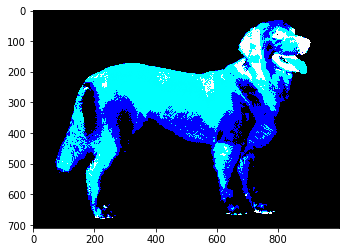

In [27]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.show()
    standardization = tf.image.per_image_standardization(img_data)
    plt.imshow(np.asarray(standardization.eval(), dtype='uint8'))
    plt.show()

## 图像预处理——增加维度  
使用的图像数据格式通常是（height, width, channel），只能表示一张图像；而Inception模型要求的输入g格式却是（batch, height, width, channel），即同时将多张图像送入网络  

tf.expand_dims(imput, dim, name=None)  

Returns:A Tensor. Has the same type as input. Contains the same data as input, but its shape has an additional dimension of size 1 added.(向tensor中插入维度1，插入位置就是参数代表的位置（维度从0开始）)

In [2]:
import tensorflow as tf
import numpy as np

# tf.expand_dims(input, dim, name=None),dim代表需要插入维度的位置
t = [[2,3,3],[1,5,5]]
print('t_shape：', np.shape(t))

t_shape： (2, 3)


In [3]:
t1 = tf.expand_dims(t, 0)
print('t1_shape:', np.shape(t1))

t1_shape: (1, 2, 3)


In [4]:
t2 = tf.expand_dims(t, 1)
print('t2_shape:', np.shape(t2))

t2_shape: (2, 1, 3)


In [7]:
t3 = tf.expand_dims(t, 2)
print('t3_shape:', np.shape(t3))

t3_shape: (2, 3, 1)


In [8]:
t4 = tf.expand_dims(t, -1)
print('t4_shape:', np.shape(t4))

t4_shape: (2, 3, 1)
